<a href="https://colab.research.google.com/github/KashyretsIvanna/ml/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0__%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторна робота 1**
Використання алгоритму кластеризації K-Means для аналізу даних у Python

Виконала студентка КП-41мп

Каширець Іванна

2025












# Частина 1

**Завдання:**

виконати кластеризацію клієнтів банку для надання  позики різного типу на основі даних про цих клієнтів, надати відповіді на  поставлені питання у ході виконання програмного коду.






### Завантаження даних

In [ ]:
#imports
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Висновок: Ми отримали набір даних про заявки на кредити, що містить наступні параметри для кожного позичальника:

Loan_ID – унікальний ідентифікатор заявки на кредит.
Gender – стать позичальника (Male – чоловік, Female – жінка).
Married – чи одружений позичальник (Yes – так, No – ні).
Dependents – кількість утриманців.
Education – рівень освіти (Graduate – випускник, Not Graduate – не випускник).
Self_Employed – чи є позичальник самозайнятим (Yes – так, No – ні).
ApplicantIncome – дохід основного заявника.
CoapplicantIncome – дохід співзаявника (якщо є).
LoanAmount – сума кредиту (ймовірно, у тисячах).
Loan_Amount_Term – термін кредиту (в місяцях).
Credit_History – наявність кредитної історії (1.0 – є, 0.0 – немає).
Property_Area – тип нерухомості (Rural – сільська місцевість, Urban – міська).
Loan_Status – статус видачі кредиту (Y – схвалено, N – відхилено).



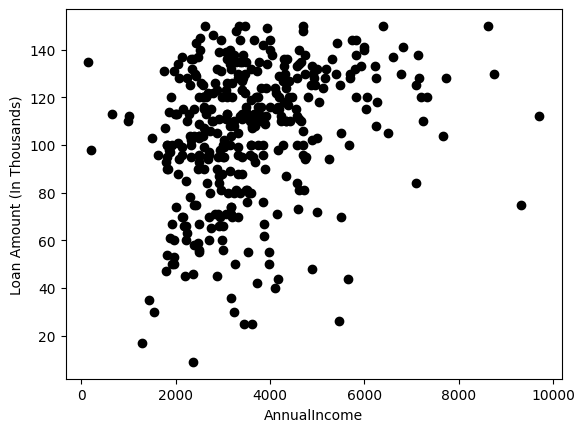

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


Висновок: на діаграмі зображено залежність кількості кредиту та доходу позичальників.З діагарми видно, що більше кредитів мають позичальники з меншим доходом. Більша частина позичальників має дохід від 2000 та лише кілька зних отримують дохід менше цієї суми.

###Алгоритм кластеризації k-means

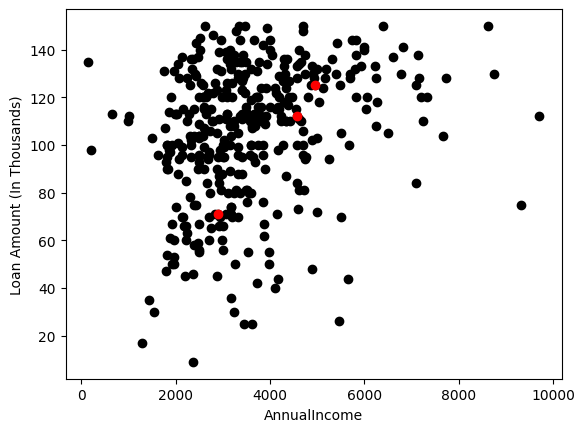

In [ ]:
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


Висновок: Вибирається K випадкових точок із датасету X (який містить дані про кредити).
Ці точки будуть початковими центроїдами кластерів. Обрані випадкові цинтроїди зображені червоним кольором.

In [ ]:
diff = 1
j = 0

while diff != 0:
    XD = X.copy()
    i = 1

    # Обчислення відстаней між центроїдами та точками
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"]) ** 2
            d2 = (row_c["LoanAmount"] - row_d["LoanAmount"]) ** 2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i += 1

    # Визначення кластерів
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)

    X["Cluster"] = C

    # Оновлення центроїдів
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]

    if j == 0:
        diff = 1
        j += 1
    else:
        diff = (Centroids_new["LoanAmount"] - Centroids["LoanAmount"]).sum() + \
               (Centroids_new["ApplicantIncome"] - Centroids["ApplicantIncome"]).sum()
        print(diff)

    Centroids = Centroids_new


0.0


<ipython-input-9-c29f33550300>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-c29f33550300>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = C
<ipython-input-9-c29f33550300>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Висновок: Цей код виконує кластеризацію методом K-Means, поступово оновлюючи центроїди кластерів, поки їх положення не перестане змінюватися.
Код виводить значення diffs. Для визначення центроїдів знадобилось 4 ітерації, що видно в виведених значеннях. Адже останнє - четверте значення дорівнює 0, чого й потрібно було досягти.
Отже, код поступово групує точки в кластери на основі схожості значень доходу (ApplicantIncome) і суми кредиту (LoanAmount), доки центроїди кластерів перестануть зміщуватися

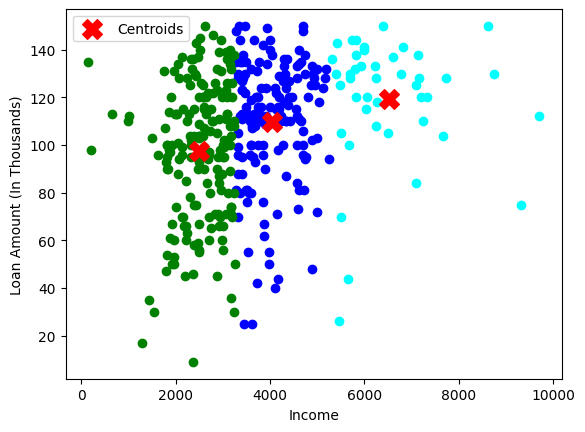

In [ ]:
color = ['blue', 'green', 'cyan']

for k in range(K):
    data = X[X["Cluster"] == k + 1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])

# Відображення центроїдів
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red', marker='X', s=200, label='Centroids')

# Додавання підписів та відображення графіка
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.show()



Даний код візуалізує центроїди та кожен окремий кластир позначається відповідно іншим кольором. До першого кластеру було віднесено позичальників з низьким доходом, до другого - з середнім та до третього - з високим.

# Частина 2

**Завдання:**

реалізувати алгоритми кластеризації k-means та  k-means++ для ініціалізації центроїдів у Python, а також побудувати криву  ліктя, щоб визначити, яка повинна бути потрібна кількість кластерів для  вказаного набору даних. Потрібно надати відповіді на поставлені питання у  ході виконання програмного коду та пояснити отриманий результат.

###Завантаження даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


In [ ]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Висновок: Ці дані представляють сегментовану інформацію про покупки клієнтів у різних регіонах і каналах збуту.

###Аналіз даних

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Висновок: Ці статистичні показники описують поведінку клієнтів щодо їхніх закупівель у різних категоріях товарів. Всього у вибірці 440 клієнтів, які належать до різних каналів збуту та регіонів. Середнє значення для Channel ближче до 1. Клієнти переважно з другого та третього регіонів, що підтверджується середнім значенням для Region, яке становить приблизно 2.54.

Щодо закупівель, найбільше клієнти витрачають на свіжі продукти, середнє значення яких складає 12,000, проте цей показник має значний розкид, оскільки деякі клієнти закуповують значно більше за інших – максимальне значення сягає 112,151. Аналогічна ситуація з бакалією та молочними продуктами, де середні значення становлять 7,951 та 5,796 відповідно, проте максимальні закупівлі сягають десятків тисяч одиниць товару. Це свідчить про те, що деякі клієнти здійснюють дуже великі замовлення, тоді як інші купують порівняно мало.

Заморожені продукти та мийні засоби також демонструють значну варіативність. Наприклад, мінімальна закупівля заморожених продуктів складає всього 25, тоді як максимальна – 60,869, що вказує на суттєві відмінності у потребах клієнтів. Делікатесні товари мають найменші середні закупівлі, приблизно 1,524, але навіть у цій категорії є клієнти, які закуповують значно більше.

Якщо порівнювати середні значення та медіани, можна побачити, що розподіл у багатьох категоріях є зміщеним, тобто є група клієнтів, які купують набагато більше за середнє. Наприклад, для свіжих продуктів медіана 8,504, що значно нижче середнього значення 12,000, а це означає, що основна маса клієнтів витрачає менше, але є декілька великих покупців, які впливають на середній показник. Це ж саме спостерігається у молочних продуктах, бакалії та інших категоріях.


In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# statistics of scaled data
pd.DataFrame(data_scaled).describe()



,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Висновок: Ці результати показують основні статистичні характеристики стандартизованих даних.

Кількість значень у кожному стовпці (count) дорівнює 440, що відповідає розміру вибірки. Середнє значення (mean) для всіх ознак наближається до нуля, що підтверджує правильність стандартизації. Аналогічно, стандартне відхилення (std) для всіх стовпців знаходиться приблизно на рівні 1, що є очікуваним результатом після застосування StandardScaler.

Мінімальні та максимальні значення (min і max) показують розподіл даних після стандартизації. Наприклад, найменше значення становить приблизно -1.99, а найбільше — 16.48, що свідчить про наявність викидів або значного розкиду в деяких змінних.

Перцентилі (25%, 50% і 75%) демонструють, що більшість значень сконцентрована в межах стандартного розподілу (близько -1 до 1), хоча в деяких стовпцях спостерігається більша варіативність.

###Застосування алгоритму k-means+++

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)


KMeans(n_clusters=2)

In [ ]:
# inertia on the fitted data
kmeans.inertia_


2599.640455258788

Висновок: Цей результат показує значення інерції після виконання алгоритму k-means на стандартизованих даних.

Інерція — це сумарна сума квадратів відстаней між кожною точкою даних та її відповідним центроїдом. Чим менше це значення, тим щільніше згруповані точки навколо своїх кластерних центрів, що свідчить про якісніший поділ даних.

У цьому випадку інерція дорівнює 2599.64, що означає, що після застосування k-means з 2 кластерами отримані центроїди досить добре описують розподіл даних.

Якщо б ми збільшували кількість кластерів , значення інерції зменшувалося б, оскільки кожна точка була б ближче до свого центроїда.

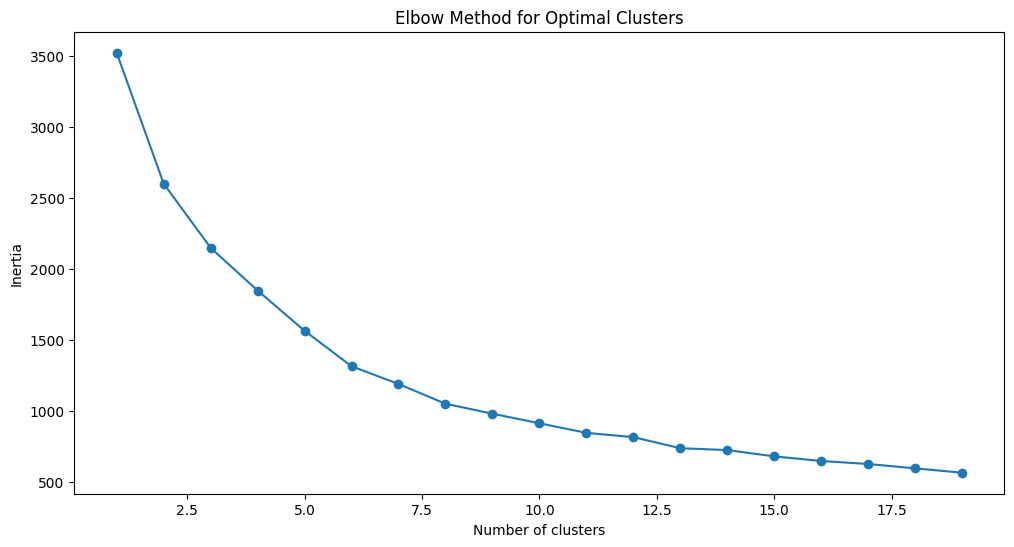

In [ ]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []

for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})

plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()



Висновок:Цей код застосовує метод k-means для різної кількості кластерів (від 1 до 19) і зберігає значення інерції для кожного запуску.

Спочатку створюється порожній список SSE, куди будуть записуватися значення інерції (Sum of Squared Errors), яка показує, наскільки добре дані згруповані навколо своїх центроїдів.

Далі в циклі для кожної кількості кластерів (n_clusters від 1 до 19) створюється модель KMeans, яка:

Ініціалізує центроїди за допомогою методу k-means++ (що допомагає отримати кращі початкові центроїди).
Запускається fit(), що навчає алгоритм на стандартизованих даних data_scaled.
Обчислює значення інерції (inertia_) та додає його до списку SSE.
По осі X – кількість кластерів.
По осі Y – значення інерції.

Цей графік реалізує метод "лікоть" (Elbow Method), який допомагає визначити оптимальну кількість кластерів. Оптимальне число кластерів відповідає точці, де крива інерції різко змінює нахил, нагадуючи лікоть.

Напевно оптимальне значення. - 6 кластирів, адже тоді він різко міняє нахил.


In [ ]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Висновок: я обрала 6 кластирів

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()


,count
cluster,
0,245
2,128
4,53
3,10
1,4


Висновок: Результат вказує на кількість елементів, які потрапили в кожен з кластерів після виконання алгоритму KMeans.

Кластер 0 містить 245 елементів — найбільший кластер.
Кластер 2 містить 128 елементів.
Кластер 4 містить 53 елементи.
Кластер 3 містить 10 елементів.
Кластер 1 містить 4 елементи — найменший кластер.

#Висновок

Отже, було використано алгоритм кластеризації k-means та k-means++ для аналізу даних про позичальники та покупки. Було визначено оптимальну кількість кластерів для даних про покупки, для цього застосовано метод ліктя. Після цього розподілено дані по кластерах. Для даних про позичальників було обрано 3 кластери для дослідження, після чого методом оновлення центроїдів поки відстані не перестанутьзмінюватись(k-means), було визначено оптимальні центроїди та розподілено дані по цих кластерах.

# Питання для самоперевірки

In [ ]:
1. Що таке кластеризація? Які властивості кластерів ви знаєте?
Кластеризація – це техніка машинного навчання, яка включає групування точок даних у множини,
які називаються кластерами.  Враховуючи набір точок даних, ми можемо використовувати алгоритм
кластеризації, щоб класифікувати кожну точку даних у певну групу. Точки  даних, які входять до однієї групи,
повинні мати подібні властивості та/або  особливості, тоді як точки даних у різних групах повинні мати дуже різні
властивості та/або особливості.

2. Кластеризація відноситься до задач машинного навчання без нагляду
(Unsupervised learning) чи це контроловане навчання (Supervised learning)?
Кластеризація є методом неконтрольованого  навчання (Unsupervised learning) і є поширеною технікою для аналізу
статистичних даних.


3. Які методи та алгоритми кластеризації ви знаєте?
  1. Partitioning methods (Методи розбиття)
  k-Means – поділяє дані на k кластерів, мінімізуючи відстань між точками та центроїдами.
  k-Medoids – схожий на k-Means, але вибирає реальні точки як центроїди, що підвищує стійкість до викидів.
  k-Modes – розширює k-Means для категоріальних даних.
  Fuzzy C-Means  – дозволяє точці належати до кількох кластерів із певною ймовірністю.
  PAM , CLARA , CLARANS  – варіації k-Medoids для обробки великих наборів даних.

  2. Hierarchical methods (Ієрархічні методи)
  Divisive  – розпочинається з одного великого кластера і поступово розділяє його.
  Agglomerative (AGNES, BIRCH, CURE, ROCK, Chameleon) – навпаки, починає з окремих точок і поступово об’єднує їх у кластери.

  3. Density-based methods (Методи, що базуються на щільності)
  DBSCAN  – знаходить кластери довільної форми на основі щільності точок.
  OPTICS – розширена версія DBSCAN, краще працює з кластерами різної щільності.
  STING , CLIQUE – використовують сіткове подання простору для швидкої кластеризації.
  DENCLUE, Wave Cluster – методи, що використовують оцінку щільності функції розподілу даних.

  4. Graph-based methods (Графові методи кластеризації)
  MST Clustering – базується на мінімальному остовному дереві (MST).
  OPOSSUM , SNN Similarity Clustering  – методи, що використовують схожість між сусідами в графах.

  5. Model-based clustering (Модельні методи кластеризації)
  EM Algorithm  – оцінює ймовірності приналежності точки до кластерів (використовується у Gaussian Mixture Models).
  Auto Class  – підхід, що використовує байєсівські методи для кластеризації.
  COBWEB  – ієрархічний підхід для поступового розбиття даних.
  ANN Clustering  – методи, засновані на штучних нейронних мережах.

4. Наведіть приклади ієрархічних, щільнісних та ітеративних методів
кластеризації, їх переваги та недоліки.
Ітеративні:
  1) Алгоритм k-середніх:
    Переваги алгоритму k- means:
    − простота та швидкість використання.
    Недоліки алгоритму k- means:
    − алгоритм дуже чутливий до викидів (outliers), які можуть  спотворювати середнє.
    Можливим вирішенням цієї проблеми є  використання модифікації алгоритму – алгоритм k-медіани;
    − алгоритм може повільно працювати на великих наборах даних.
  2) Метод найближчого сусіда:
    Переваги:
    Простота реалізації та інтуїтивне розуміння.
    Гнучкість – не вимагає припущень про розподіл даних.
    Може ефективно працювати з нелінійними межами між класами.
    Використовує всю навчальну вибірку, що робить його універсальним для різних задач.
    Недоліки:
    Висока обчислювальна складність при великих обсягах даних (O(n) на один запит).
    Чутливість до вибору метрики відстані та параметра k.
    Погано працює у випадках, коли класи мають неоднорідну щільність або складну структуру.
    Вразливий до вибору навчальних даних і може давати хибні результати при наявності шуму.
  3) Алгоритм ЕМ
    Алгоритм EM простий в реалізації, не чутливий до ізольованих
    об'єктів  і швидко сходиться при вдалій ініціалізації. Однак він вимагає для
    ініціалізації  кількості кластерів k, що передбачає наявність апріорних знань про дані.
    Крім  того, при невдалій ініціалізації збіжність алгоритму може виявитися  повільною або може бути отриманий
    неякісний результат.
  4) Алгоритм PAM:
    Алгоритм менш чутливий до шумів і викидів даних, ніж алгоритм  k-means,
    оскільки медіана менше піддається впливам викидів. PAM  ефективний для невеликих наборів даних,
    його не бажано використовувати  для великих наборів даних.
Ієрархічні:
  1)Алгоритм BIRCH:
    Завдяки узагальненому вигляду кластерів, швидкість кластеризації  збільшується,
    алгоритм BIRCH (Balanced Iterative Reducing and Clustering  using Hierarchies) при цьому володіє великим
    масштабуванням.
  2)Алгоритм WaveCluster:
    Головні особливості  WaveCluster:
    − складність реалізації;
    − алгоритм може виявляти кластери довільних форм;
    − алгоритм не чутливий до шумів;
    − алгоритм може бути застосований тільки до даних низької  розмірності.
  3) Алгоритм CLARA:
    Для великих баз  даних цей алгоритм ефективніший, ніж алгоритм PAM.
Щільнісні:
  1)Алгоритм DBSCAN:
    Хоча, на відміну від методів розбиття, DBSCAN не  вимагає заздалегідь вказувати число одержуваних кластерів,
    виникне потреба  у вказівках значень параметрів ε і MinPts, які безпосередньо впливають на  результат кластеризації.
    Оптимальні значення цих параметрів складно  визначити, особливо для багатовимірних просторів даних.
  2)Алгоритм OPTICS:
    Його основна  ідея схожа на DBSCAN, але він вирішує один з основних недоліків DBSCAN –
    проблему визначення значущих кластерів в наборах даних різної щільності.


5. Які застосування кластеризації в реальних сценаріях ви знаєте?
  Сегментація клієнтів у маркетингу
  Виявлення аномалій у фінансах
  Аналіз текстів та групування документів
  Кластеризація біологічних даних (генів, білків)
  Кластеризація документів
  Сегментація зображень
6. Які метрики оцінки кластеризації ви знаєте?
Інерція,Індекс Данна
7. Що таке кластеризація K-Means? Як вибрати потрібну кількість кластерів
у K-Means?
  K-Means – це ітеративний алгоритм, що шукає K центрів кластерів.
  Вибір K:
  - Метод ліктя (Elbow Method)
  - Силуетний аналіз
8. Для чого використовується алгоритм K-Means ++ ?
  Використовується для покращення ініціалізації центрів кластерів, щоб уникнути локальних мінімумів.
9. Як реалізувати алгоритм кластеризації K-Means та алгоритм K-Means ++ у
Python?
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
  kmeans.fit(data)
  labels = kmeans.labels_
10. Для чого використовується стандартизація даних?
  Щоб привести дані до єдиного масштабу, що покращує роботу алгоритмів.


11. Як реалізувати у Python стандартизацію даних?
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
12. Для чого використовуються пакети Python: pandas, numpy, matplotlib,
random?
  pandas – обробка таблиць
  numpy – робота з масивами
  matplotlib – візуалізація
  random – генерація випадкових чисел
13. Які методи Python використовуются для прочитання файлу у форматі CSV
та перегляду перших п’яти рядків даних?
  import pandas as pd
  df = pd.read_csv("data.csv")
  print(df.head())
14. Як реалізувати у Python ініціалізацію центроїдів кластера та та
побудувати криву ліктя?
  SSE = []

  for cluster in range(1, 20):
      kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
      kmeans.fit(data_scaled)
      SSE.append(kmeans.inertia_)

  # Converting the results into a dataframe and plotting them
  frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})

  plt.figure(figsize=(12, 6))
  plt.plot(frame['Cluster'], frame['SSE'], marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal Clusters')
  plt.show()
